In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import plotly.graph_objects as go
import re


In [2]:
training_curves = glob.glob('./results/*/*csv')
#training_curves2 = glob.glob('./results-MinMax-Schedule/*/*csv')

In [3]:
dfs = {}
res = {}
for curve in training_curves:#+training_curves2:
    name = curve.split('/')[2]
    f = pd.read_csv(curve).drop('epoch', axis = 1)
    f.index.name = 'epoch'
    dfs[name] = f.reset_index()
    res[name] = f.loc[f.val_loss.idxmin()].copy()
    #print(name ,f.val_loss.idxmin())
    res[name]['bst_epoch'] = f.val_loss.idxmin()
    res[name]['max_epoch'] = f.shape[0]
    res[name]['bst_epoch_lim'] = f[f.index <= 1_000_000].val_loss.idxmin()
    res[name]['loss_lim'] = f[f.index <= 1_000_000].loc[res[name]['bst_epoch_lim'], 'loss']
    res[name]['val_loss_lim'] = f[f.index <= 1_000_000].loc[res[name]['bst_epoch_lim'], 'val_loss']

In [4]:
df = pd.DataFrame(res).T.sort_values(by = 'val_loss')
df[['Features', 'Network']] = df.index.str.split('--').to_list()
df[['Type', 'Hops', 'Neis']] = df['Features'].str.split('-').tolist()
df['Neis'] = df['Neis'].str.extract(r'(\d+)').astype(int)
df['Hops'] = df['Hops'].str.extract(r'(\d+)').astype(int)
df.loc[df['Hops'] == 1, 'Hops'] = 0
df.loc[df['Hops'] == 0, 'Type'] = 'None'



In [5]:
#df.sort_values(by = 'val_loss')
#df = df[df['max_epoch'] >= 4950]
#df = df.set_index(['Type', 'Hops', 'Neis', 'Network'])

In [6]:
pal = sns.color_palette('tab10')

In [7]:
df_bst = df.groupby(['Type', 'Hops', 'Neis'])[['val_loss', 'loss']].min().reset_index()

In [8]:
df_bst['Hops'].unique()

array([2, 4, 6])

In [9]:
df_small = df.loc[df['Network'] == '16_32tanh']
df_big = df.loc[df['Network'] == '16_32_32tanh']

In [11]:
df

,loss,mae,val_loss,val_mae,bst_epoch,max_epoch,bst_epoch_lim,loss_lim,val_loss_lim,Features,Network,Type,Hops,Neis
cycles-exp4-coords4--16_32tanh,0.002556,0.037293,0.002502,0.034250,999831.0,1000000.0,999831.0,0.002556,0.002502,cycles-exp4-coords4,16_32tanh,cycles,4,4
cycles-exp6-coords4--16_32tanh,0.002484,0.036517,0.002724,0.035600,1396306.0,1424916.0,960735.0,0.002787,0.003115,cycles-exp6-coords4,16_32tanh,cycles,6,4
cycles-exp2-coords4--16_32tanh,0.004237,0.049069,0.004369,0.048054,992995.0,1000000.0,992995.0,0.004237,0.004369,cycles-exp2-coords4,16_32tanh,cycles,2,4
cycles-exp4-coords2--16_32tanh,0.005526,0.057212,0.006935,0.062592,3474920.0,3475721.0,995062.0,0.006863,0.008007,cycles-exp4-coords2,16_32tanh,cycles,4,2
cycles-exp4-coords3--16_32tanh,0.005784,0.057139,0.007150,0.061740,992579.0,1000000.0,992579.0,0.005784,0.007150,cycles-exp4-coords3,16_32tanh,cycles,4,3
cycles-exp2-coords3--16_32tanh,0.006815,0.061458,0.007614,0.063660,998850.0,1000000.0,998850.0,0.006815,0.007614,cycles-exp2-coords3,16_32tanh,cycles,2,3
cycles-exp2-coords2--16_32tanh,0.007290,0.064881,0.008143,0.067879,989308.0,1000000.0,989308.0,0.007290,0.008143,cycles-exp2-coords2,16_32tanh,cycles,2,2
cycles-exp6-coords3--16_32tanh,0.005677,0.057059,0.010038,0.072257,995934.0,1000000.0,995934.0,0.005677,0.010038,cycles-exp6-coords3,16_32tanh,cycles,6,3
cycles-exp6-coords2--16_32tanh,0.007692,0.066885,0.011454,0.078864,996157.0,1000000.0,996157.0,0.007692,0.011454,cycles-exp6-coords2,16_32tanh,cycles,6,2
cycles-exp4-coords1--16_32tanh,0.023707,0.106969,0.028849,0.115881,898713.0,900000.0,898713.0,0.023707,0.028849,cycles-exp4-coords1,16_32tanh,cycles,4,1


In [18]:
print(4000000 - 1424916.0)
print(4000000 - 3475721.0)

2575084.0
524279.0


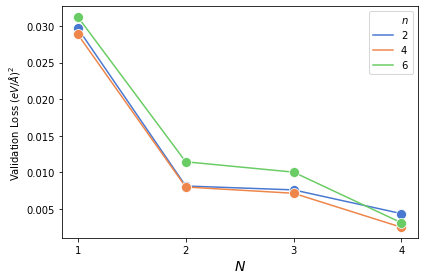

In [13]:
fig, ax = plt.subplots(ncols = 1)

sns.lineplot(data = df_small[(df_small['Hops'] <= 8) & (df_small['Neis'] >= 0) & ((df_small['Type'] == 'cycles') |  (df_small['Type'] == 'None'))], x = 'Neis', y = 'val_loss_lim', hue = 'Hops', style = 'Type', palette= 'muted', markers=True, **{'markersize':10}, ax = ax)
#ax.set_ylim(top = 0.25)
ax.set_xticks([1, 2, 3, 4])
ax.set_ylabel(r'Validation Loss $(eV/Å)^2$')
ax.set_xlabel(r'$N$', fontdict={'size':14})
ax.get_legend().remove()
#ax.legend([x.capitalize() for x in ax.get_legend_handles_labels()[-1]])
handles, labels = ax.get_legend_handles_labels()
labels[0] = r'$n$'
#labels[-2] = labels[-2].capitalize()
labels, handels = labels[0:4], handles[0:4]
ax.legend(handles, labels, loc = 0)
plt.tight_layout()
plt.savefig('figures/BTO-benchmark.pdf', bbox_inches='tight')
plt.savefig('figures/BTO-benchmark.svg', bbox_inches='tight')

In [ ]:
labels

In [ ]:
sns.lineplot(data = df[(df['Hops'] < 10) & (df['Neis'] > 0)], x = 'Neis', y = 'val_mae', hue = 'Hops', style = 'Type', palette= 'muted', markers=True, **{'markersize':10})
plt.ylim(top = 0.15)
plt.ylabel('Loss')
plt.xlabel('Neis')

#plt.savefig('analysis-3-loss-neis.svg')

In [ ]:
k = 0
for i in  [0, 2, 4, 6, 8]:
    #sns.scatterplot(data = df_bst[(df_bst['Type'] == 'cycles') & (df_bst['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k])
    sns.lineplot(data = df_small[(df_small['Type'] == 'cycles') & (df_small['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k], marker='o', **{'markersize':10}, label = str(i))
    sns.lineplot(data = df_small[(df_small['Type'] == 'paths') & (df_small['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k], marker='s', **{'linestyle':'--', 'markersize':10}, alpha = 0.4, label = str(i))

#    sns.scatterplot(data = df_small[((df_small['Type'] == 'paths') | (df_small['Type'] == None)) & (df_small['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k])
#    sns.lineplot(data = df_small[((df_small['Type'] == 'paths') | (df_small['Type'] == None)) & (df_small['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k],  **{'linestyle':'--'})
    k = k + 1
plt.ylim(top = 0.2)

In [ ]:
k = 0
for i in  [0, 2, 4, 6, 8]:
    #sns.scatterplot(data = df_bst[(df_bst['Type'] == 'cycles') & (df_bst['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k])
    sns.lineplot(data = df_bst[(df_bst['Type'] == 'cycles') & (df_bst['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k], marker='o', **{'markersize':10}, label = str(i))
    sns.lineplot(data = df_bst[(df_bst['Type'] == 'paths') & (df_bst['Hops'] == i)], x = 'Neis', y = 'val_loss',  color = pal[k], marker='s', **{'linestyle':'--', 'markersize':10}, alpha = 0.4, label = str(i))

    k = k + 1
plt.ylim(top = 0.2)